In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((.5,.5,.5),(.5,.5,.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train = True,
                                       download = True,transform=transform )

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True,num_workers = 2)

testset = torchvision.datasets.CIFAR10(root='./data',train = False,
                                       download = True,transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle = False,num_workers = 2)

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


 ship  frog plane  bird


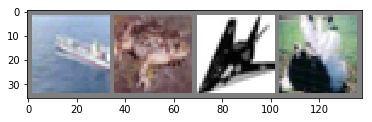

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + .5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = .001, momentum = .9)

In [14]:
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss+= loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.191
[1,  4000] loss: 1.829
[1,  6000] loss: 1.681
[1,  8000] loss: 1.598
[1, 10000] loss: 1.542
[1, 12000] loss: 1.483
[2,  2000] loss: 1.417
[2,  4000] loss: 1.384
[2,  6000] loss: 1.354
[2,  8000] loss: 1.319
[2, 10000] loss: 1.311
[2, 12000] loss: 1.285
Finished Training


GroundTruth:    cat  ship  ship plane


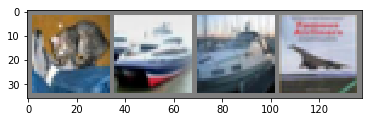

In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
outputs = net(images)

In [21]:
_,pred = torch.max(outputs,1)
for j in range(4):
    print(classes[pred[j]] )

frog
ship
ship
ship
